In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from group import autogroup, autogroupcat
import warnings
warnings.filterwarnings('ignore')

#  Estimation of the likelihood of a claim by a customer

## Loading and formating the data

In [2]:
traindeva=pd.read_sas("will_claim_12md.sas7bdat")
traindevb=pd.read_sas("noclaim_12md.sas7bdat")
traindev=traindeva.append(traindevb)
testa=pd.read_sas("will_claim_12mv.sas7bdat")
testb=pd.read_sas("noclaim_12mv.sas7bdat")
test=testa.append(testb)

In [3]:
traindev=traindev.fillna(0)
test=test.fillna(0)
traindev['claim_flag']=traindev.claim_N12M.clip(upper=1)
varlist=['mentorsectorname','No_product','wageroll', 'employees','minutes_1Ma','volume_1Ma','minutes_L3M', 'volume_L3M',
       'minutes_HS_L3M', 'pct_HS_L3M', 'minutes_EL_L3M', 'pct_EL_L3M',
       'minutes_ENV_L3M', 'pct_ENV_L3M', 'max_pct_L3M', 'minutes_L6M',
       'volume_L6M', 'minutes_HS_L6M', 'pct_HS_L6M', 'minutes_EL_L6M',
       'pct_EL_L6M', 'minutes_ENV_L6M', 'pct_ENV_L6M', 'max_pct_L6M',
       'minutes_L12M', 'volume_L12M', 'minutes_HS_L12M', 'pct_HS_L12M',
       'minutes_EL_L12M', 'pct_EL_L12M', 'minutes_ENV_L12M', 'pct_ENV_L12M',
       'max_pct_L12M','claim_flag']
traindev=traindev[varlist]

test['claim_flag']=test.claim_N12M.clip(upper=1)
test=test[varlist]
test.head()

,mentorsectorname,No_product,wageroll,employees,minutes_1Ma,volume_1Ma,minutes_L3M,volume_L3M,minutes_HS_L3M,pct_HS_L3M,...,minutes_L12M,volume_L12M,minutes_HS_L12M,pct_HS_L12M,minutes_EL_L12M,pct_EL_L12M,minutes_ENV_L12M,pct_ENV_L12M,max_pct_L12M,claim_flag
0,b'Transport & Storage',2.0,10000000.0,650.0,998.0,58.0,3473.0,181.0,210.0,33.9,...,11326.0,523.0,560.0,90.4,315.0,111.6,0.0,0.0,111.6,1.0
1,b'Manufacturing',1.0,7883855.0,373.0,200.0,18.0,1021.0,78.0,0.0,0.0,...,7010.0,454.0,0.0,0.0,840.0,208.8,0.0,0.0,208.8,1.0
2,b'Professionals & Offices',2.0,375000.0,40.0,795.0,27.0,1253.0,48.0,105.0,11.4,...,2399.0,64.0,210.0,22.8,210.0,115.2,0.0,0.0,115.2,1.0
3,b'Education',2.0,1000000.0,140.0,4.0,1.0,365.0,21.0,210.0,10.9,...,1660.0,129.0,840.0,14.5,420.0,22.4,0.0,0.0,23.3,1.0
4,b'Education',1.0,22682203.0,702.0,372.0,20.0,1685.0,84.0,0.0,0.0,...,2932.0,171.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
#The text variables have been converted into a "byte" format that cause trouble
#this step is to extract and store the string for the variable
a=[]
for elem in traindev.mentorsectorname:
    a+=[str(elem)[2:-1]]
traindev['mentorsectorname']=a

t=[]
for elem in test.mentorsectorname:
    t+=[str(elem)[2:-1]]
test['mentorsectorname']=t

traindev=traindev[traindev.mentorsectorname!= '']
test=test[test.mentorsectorname!= '']

## variables selection and transformation

#### Grouping the text variable

In [5]:
g=autogroupcat(traindev,'mentorsectorname','claim_flag', group_method='IV' )
print(g)

Value                                       Good     Bad       Vol    Bad Rate     WoE
Agriculture, Motor Trade:                   1179      13     7.0 %        0.01    0.95
Construction, Retail:                       3461      66    20.8 %        0.02     0.4
Education:                                   421      24     2.6 %        0.05   -0.69
Healthcare, Not for Profit:                 1729      86    10.7 %        0.05   -0.56
Hospitality & Leisure, Wholesale:           2980      84    18.1 %        0.03    0.01
Manufacturing, Other:                       2488      55    15.0 %        0.02    0.26
Professionals &...sport & Storage:          4216     142    25.7 %        0.03   -0.17
Information value: 0.15
Gini: 20.85



Value                                       Good     Bad       Vol    Bad Rate     WoE
Agriculture, Motor Trade:                   1179      13     7.0 %        0.01    0.95
Construction, M..., Other, Retail:          5949     121    35.8 %        0.02    0.34
Education, Heal... Not for Profit:          2150     110    13.3 %        0.05   -0.58
Hospitality & L...rage, Wholesale:          7196     226    43.8 %        0.03    -0.1
Information value: 0.14
Gini: 19.55



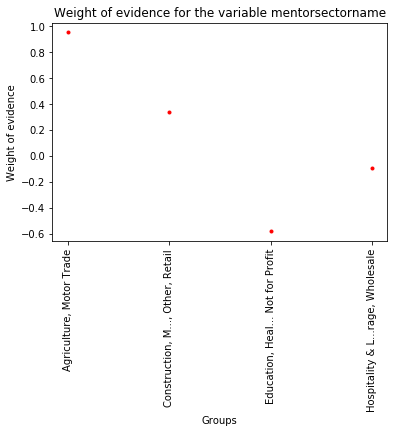

In [6]:
g=autogroupcat(traindev,'mentorsectorname','claim_flag', group_method='IV' )
g.movegroup('Education','Healthcare, Not for Profit', ['Education'] )
g.movegroup('Construction, Retail','Manufacturing, Other', ['Construction', 'Retail'] )
g.movegroup('Hospitality & Leisure, Wholesale','Professionals &...sport & Storage',['Hospitality & Leisure', 'Wholesale'])
#g.movegroup('Wholesale','Construction, M...r Trade, Retail' , ['Wholesale'])
print(g)
g.graph(save=True, name='sector')

#### Grouping all the numerical variables

In [7]:
#The autogrouping will be applied to all variables and the best ones will be chosen for the next step
for elem in varlist[1:-1]:
    print('**'*10, elem,'**'*10)
    print('paragon')
    G=autogroup(traindev,elem,'claim_flag')
    print(G)
    print ('IV')
    Gb=autogroup(traindev,elem,'claim_flag',group_method='IV', target=4)
    print(Gb)
    print('*-*'*20)

******************** No_product ********************
paragon
Value                                       Good     Bad       Vol    Bad Rate     WoE
1.0-->4.0:                                 16474     470   100.0 %        0.03     0.0
Information value: 0.0
Gini: 0.0

IV
Value                                       Good     Bad       Vol    Bad Rate     WoE
1.0-->2.0:                                 16224     459    98.5 %        0.03    0.01
3.0-->4.0:                                   250      11     1.5 %        0.04   -0.43
Information value: 0.0
Gini: 0.82

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
******************** wageroll ********************
paragon
Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->39000.0:                              1714       6    10.2 %         0.0     2.1
39115.0-->60000.0:                          2246      24    13.4 %        0.01    0.98
60282.0-->175000.0:                         5416   

Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->1.0:                                 12383     153    74.0 %        0.01    0.84
2.0-->3.0:                                  1409      45     8.6 %        0.03   -0.11
4.0-->9.0:                                  1401      77     8.7 %        0.05   -0.66
10.0-->15.0:                                 540      49     3.5 %        0.08   -1.16
16.0-->32.0:                                 492      73     3.3 %        0.13   -1.65
33.0-->486.0:                                249      73     1.9 %        0.23   -2.33
Information value: 1.03
Gini: 49.04

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
******************** minutes_HS_L3M ********************
paragon
Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->45.0:                                13932     373    84.4 %        0.03    0.06
50.0-->105.0:                               1382      

Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->1.0:                                  8878      68    52.8 %        0.01    1.32
2.0-->14.0:                                 1184      26     7.1 %        0.02    0.26
15.0-->31.0:                                1177      10     7.0 %        0.01    1.21
32.0-->86.0:                                1700      49    10.3 %        0.03   -0.01
87.0-->542.0:                               2672     179    16.8 %        0.06   -0.85
543.0-->1003.0:                              504      61     3.3 %        0.11   -1.45
1004.0-->13958.0:                            359      77     2.6 %        0.18   -2.02
Information value: 1.2
Gini: 56.1

IV
Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->1.0:                                  8878      68    52.8 %        0.01    1.32
2.0-->14.0:                                 1184      26     7.1 %        0.02    0.26
15.0-

Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->5.0:                                 16316     463    99.0 %        0.03    0.01
7.5-->630.0:                                 158       7     1.0 %        0.04   -0.44
Information value: 0.0
Gini: 0.53

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
******************** pct_ENV_L6M ********************
paragon
Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->213.0:                               16474     470   100.0 %        0.03     0.0
Information value: 0.0
Gini: 0.0

IV
Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->0.6:                                 16364     464    99.3 %        0.03    0.01
1.2-->213.0:                                 110       6     0.7 %        0.05   -0.65
Information value: 0.0
Gini: 0.61

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
*************

Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->0.1:                                  7843     105    46.9 %        0.01    0.76
0.2-->5.6:                                  1146      29     6.9 %        0.02    0.12
5.7-->55.8:                                 5005     167    30.5 %        0.03   -0.16
56.0-->101.2:                               1620      82    10.0 %        0.05   -0.57
101.4-->722.4:                               860      87     5.6 %        0.09   -1.27
Information value: 0.41
Gini: 33.92

IV
Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->0.1:                                  7843     105    46.9 %        0.01    0.76
0.2-->5.6:                                  1146      29     6.9 %        0.02    0.12
5.7-->8.4:                                   569      26     3.5 %        0.04   -0.47
8.5-->55.8:                                 4436     141    27.0 %        0.03   -0.11
56.

#### Removing the highly correlated variables

In [8]:
corrlist=['wageroll', 'employees',
          'minutes_1Ma','minutes_L3M', 'minutes_L6M','minutes_L12M',
          'volume_1Ma','volume_L3M','volume_L6M','volume_L12M',
          'minutes_EL_L3M','minutes_EL_L6M','minutes_EL_L12M','pct_EL_L6M',
            'max_pct_L3M' ]
corrver=traindev[corrlist]
corrver.corr()

,wageroll,employees,minutes_1Ma,minutes_L3M,minutes_L6M,minutes_L12M,volume_1Ma,volume_L3M,volume_L6M,volume_L12M,minutes_EL_L3M,minutes_EL_L6M,minutes_EL_L12M,pct_EL_L6M,max_pct_L3M
wageroll,1.000000,0.869499,0.278161,0.370267,0.431461,0.471402,0.334598,0.408287,0.452898,0.480716,0.185067,0.189033,0.191219,0.185913,0.310135
employees,0.869499,1.000000,0.301641,0.413957,0.488945,0.536185,0.374938,0.467139,0.520413,0.555013,0.148894,0.152783,0.151667,0.167409,0.211277
minutes_1Ma,0.278161,0.301641,1.000000,0.812063,0.710230,0.640404,0.832712,0.717464,0.644603,0.588063,0.149321,0.146551,0.138705,0.196283,0.086599
minutes_L3M,0.370267,0.413957,0.812063,1.000000,0.895992,0.815184,0.777966,0.899488,0.827173,0.753147,0.190377,0.187341,0.176872,0.246136,0.106213
minutes_L6M,0.431461,0.488945,0.710230,0.895992,1.000000,0.917923,0.724448,0.864787,0.913264,0.843332,0.192616,0.195465,0.184520,0.259365,0.108046
minutes_L12M,0.471402,0.536185,0.640404,0.815184,0.917923,1.000000,0.683904,0.825350,0.892460,0.936104,0.215170,0.225732,0.226650,0.300467,0.124423
volume_1Ma,0.334598,0.374938,0.832712,0.777966,0.724448,0.683904,1.000000,0.857823,0.783970,0.719591,0.167344,0.167228,0.168002,0.223714,0.095327
volume_L3M,0.408287,0.467139,0.717464,0.899488,0.864787,0.825350,0.857823,1.000000,0.937000,0.865499,0.199154,0.200985,0.201040,0.268458,0.112778
volume_L6M,0.452898,0.520413,0.644603,0.827173,0.913264,0.892460,0.783970,0.937000,1.000000,0.942366,0.206932,0.214269,0.215133,0.281630,0.116196
volume_L12M,0.480716,0.555013,0.588063,0.753147,0.843332,0.936104,0.719591,0.865499,0.942366,1.000000,0.215898,0.230618,0.243615,0.310335,0.127966


In [9]:
#list of the less correlated variables and verification
corrlistred=[ 'employees',
          'minutes_1Ma','minutes_L12M',
          'volume_1Ma',
          'minutes_EL_L3M','pct_EL_L6M',
            'max_pct_L3M' ]
corrverv2=traindev[corrlistred]
corrverv2.corr()

,employees,minutes_1Ma,minutes_L12M,volume_1Ma,minutes_EL_L3M,pct_EL_L6M,max_pct_L3M
employees,1.000000,0.301641,0.536185,0.374938,0.148894,0.167409,0.211277
minutes_1Ma,0.301641,1.000000,0.640404,0.832712,0.149321,0.196283,0.086599
minutes_L12M,0.536185,0.640404,1.000000,0.683904,0.215170,0.300467,0.124423
volume_1Ma,0.374938,0.832712,0.683904,1.000000,0.167344,0.223714,0.095327
minutes_EL_L3M,0.148894,0.149321,0.215170,0.167344,1.000000,0.511813,0.211342
pct_EL_L6M,0.167409,0.196283,0.300467,0.223714,0.511813,1.000000,0.401945
max_pct_L3M,0.211277,0.086599,0.124423,0.095327,0.211342,0.401945,1.000000


In [10]:
varlist2=corrlistred+['claim_flag']+['mentorsectorname']
traindev_red=traindev[varlist2]
test_red=test[varlist2]

#### Manually tuning the grouping of each variable selected so far

In [11]:
gr1=autogroup(traindev_red,varlist2[0], 'claim_flag', group_method='IV', target=1)
print(gr1)

Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->3.0:                                  2379      10    14.1 %         0.0    1.92
4.0-->11.0:                                 7227      94    43.2 %        0.01    0.79
12.0-->20.0:                                3306      93    20.1 %        0.03    0.01
21.0-->30.0:                                1398      62     8.6 %        0.04   -0.44
31.0-->50.0:                                1154      67     7.2 %        0.05   -0.71
51.0-->82.0:                                 521      51     3.4 %        0.09   -1.23
83.0-->836.0:                                478      88     3.3 %        0.16   -1.86
839.0-->3506.0:                               11       5     0.1 %        0.31   -2.77
Information value: 0.91
Gini: 49.19



employees
Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->3.0:                                  2379      10    14.1 %         0.0    1.92
4.0-->11.0:                                 7227      94    43.2 %        0.01    0.79
12.0-->20.0:                                3306      93    20.1 %        0.03    0.01
21.0-->50.0:                                2552     129    15.8 %        0.05   -0.57
51.0-->3506.0:                              1010     144     6.8 %        0.12   -1.61
Information value: 0.89
Gini: 48.58



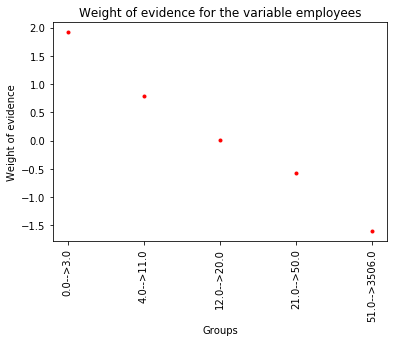

In [12]:
gr1=autogroup(traindev_red,varlist2[0], 'claim_flag', group_method='IV', target=1)
gr1.movegroup('83.0-->836.0','839.0-->3506.0')
gr1.movegroup('51.0-->82.0','83.0-->3506.0')
gr1.movegroup('21.0-->30.0','31.0-->50.0')
print(varlist2[0])
print(gr1)
gr1.graph()

In [13]:
gr2=autogroup(traindev_red,varlist2[1], 'claim_flag', group_method='IV', target=1)
print(varlist2[1])
print(gr2)

minutes_1Ma
Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->1.0:                                 13191     194    79.0 %        0.01    0.66
2.0-->35.0:                                 1737      72    10.7 %        0.04   -0.37
36.0-->147.0:                               1037      97     6.7 %        0.09   -1.19
148.0-->3249.0:                              509     107     3.6 %        0.17    -2.0
Information value: 0.84
Gini: 42.73



Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->0.0:                                 13176     193    78.9 %        0.01    0.67
1.0-->35.0:                                 1752      73    10.8 %        0.04   -0.38
36.0-->3249.0:                              1546     204    10.3 %        0.12   -1.53
Information value: 0.8
Gini: 42.08



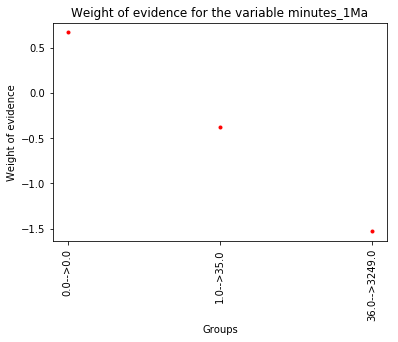

In [14]:
gr2=autogroup(traindev_red,varlist2[1], 'claim_flag', group_method='IV', target=1)
gr2.movegroup('0.0-->1.0','2.0-->35.0', mini=1.0 )
gr2.movegroup('36.0-->147.0','148.0-->3249.0')
print(gr2)
gr2.graph()

In [15]:
gr3=autogroup(traindev_red,varlist2[2], 'claim_flag', group_method='Paragon', target=1)
print(varlist2[2])
print(gr3)

minutes_L12M
Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->8.0:                                  7969      52    47.3 %        0.01    1.48
9.0-->68.0:                                 2985      50    17.9 %        0.02    0.53
69.0-->218.0:                               2220      70    13.5 %        0.03    -0.1
219.0-->761.0:                              2141     123    13.4 %        0.05    -0.7
762.0-->2611.0:                             1004     128     6.7 %        0.11    -1.5
2613.0-->28613.0:                            155      47     1.2 %        0.23   -2.36
Information value: 1.21
Gini: 56.84



Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->8.0:                                  7969      52    47.3 %        0.01    1.48
9.0-->68.0:                                 2985      50    17.9 %        0.02    0.53
69.0-->218.0:                               2220      70    13.5 %        0.03    -0.1
219.0-->761.0:                              2141     123    13.4 %        0.05    -0.7
762.0-->28613.0:                            1159     175     7.9 %        0.13   -1.67
Information value: 1.19
Gini: 56.49



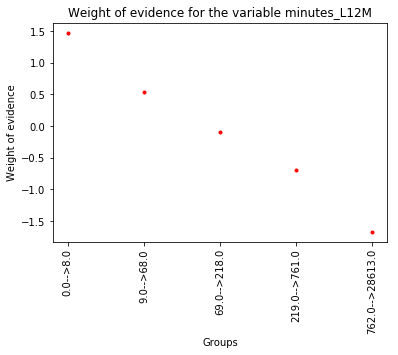

In [16]:
gr3=autogroup(traindev_red,varlist2[2], 'claim_flag', group_method='Paragon', target=1)
gr3.movegroup('762.0-->2611.0','2613.0-->28613.0')
print(gr3)
gr3.graph()

In [17]:
gr4=autogroup(traindev_red,varlist2[3], 'claim_flag', group_method='IV', target=1)
print(varlist2[3])
print(gr4)

volume_1Ma
Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->1.0:                                 14428     244    86.6 %        0.02    0.52
2.0-->6.0:                                  1442     100     9.1 %        0.06   -0.89
7.0-->20.0:                                  487      90     3.4 %        0.16   -1.87
21.0-->152.0:                                117      36     0.9 %        0.24   -2.38
Information value: 0.77
Gini: 37.32



Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->0.0:                                 13176     193    78.9 %        0.01    0.67
1-->6.0:                                    2694     151    16.8 %        0.05   -0.68
7.0-->152.0:                                 604     126     4.3 %        0.17   -1.99
Information value: 0.83
Gini: 42.12



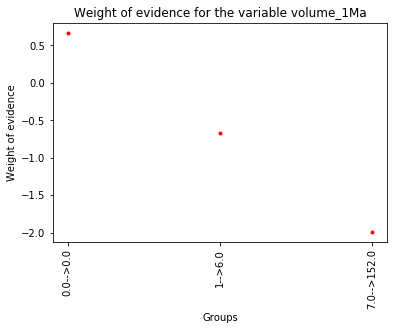

In [18]:
gr4=autogroup(traindev_red,varlist2[3], 'claim_flag', group_method='IV', target=1)
gr4.movegroup('7.0-->20.0','21.0-->152.0')
gr4.movegroup('0.0-->1.0','2.0-->6.0', mini=1)

print(gr4)
gr4.graph()

In [19]:
gr5=autogroup(traindev_red,varlist2[4], 'claim_flag', group_method='IV', target=1)
print(varlist2[4])
print(gr5)

minutes_EL_L3M
Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->5.0:                                  5865      79    35.1 %        0.01    0.75
6.3-->15.0:                                 2178      56    13.2 %        0.03     0.1
17.5-->22.5:                                2812      39    16.8 %        0.01    0.72
25.0-->67.5:                                2257      83    13.8 %        0.04   -0.25
70.0-->105.0:                               2586     165    16.2 %        0.06    -0.8
110.0-->210.0:                               563      27     3.5 %        0.05   -0.52
225.0-->450.0:                               213      21     1.4 %        0.09   -1.24
Information value: 0.42
Gini: 35.14



Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->0.0:                                  5860      79    35.1 %        0.01    0.75
5.0-->67.5:                                 7252     178    43.9 %        0.02    0.15
70.0-->450.0:                               3362     213    21.1 %        0.06    -0.8
Information value: 0.35
Gini: 30.98



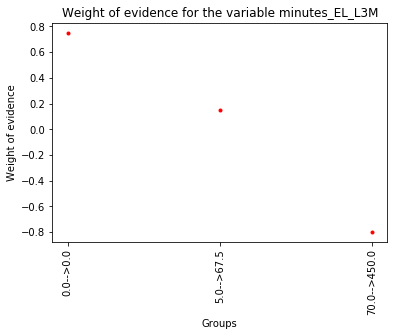

In [20]:
gr5=autogroup(traindev_red,varlist2[4], 'claim_flag', group_method='IV', target=1)
gr5.movegroup('110.0-->210.0','225.0-->450.0')
gr5.movegroup('70.0-->105.0','110.0-->450.0')
gr5.movegroup('0.0-->5.0','6.3-->15.0', mini=2)
gr5.movegroup('17.5-->22.5', '25.0-->67.5')
gr5.movegroup('5.0-->15.0', '17.5-->67.5')

print(gr5)
gr5.graph()

In [21]:
gr6=autogroup(traindev_red,varlist2[5], 'claim_flag', group_method='IV', target=1)
print(varlist2[5])
print(gr6)

pct_EL_L6M
Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->4.3:                                  9487     143    56.8 %        0.01    0.64
4.4-->9.0:                                  1132      56     7.0 %        0.05   -0.55
9.1-->12.1:                                  555      10     3.3 %        0.02    0.46
12.2-->33.6:                                2878      93    17.5 %        0.03   -0.12
33.8-->40.2:                                 560      32     3.5 %        0.05   -0.69
40.4-->48.0:                                 557      18     3.4 %        0.03   -0.12
48.1-->90.6:                                1057      80     6.7 %        0.07   -0.98
90.9-->474.0:                                248      38     1.7 %        0.13   -1.68
Information value: 0.45
Gini: 34.87



Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->0.0:                                  8340     119    49.9 %        0.01    0.69
0.1-->33.6:                                 5712     183    34.8 %        0.03   -0.12
33.8-->48.0:                                1117      50     6.9 %        0.04   -0.45
48.1-->474.0:                               1305     118     8.4 %        0.08   -1.15
Information value: 0.4
Gini: 32.83



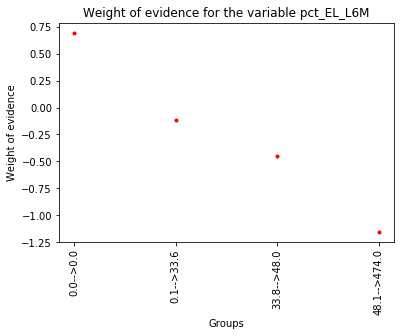

In [22]:
gr6=autogroup(traindev_red,varlist2[5], 'claim_flag', group_method='IV', target=1)
gr6.movegroup('0.0-->4.3','4.4-->9.0', mini=0.1)
gr6.movegroup('0.1-->9.0','9.1-->12.1')
gr6.movegroup('0.1-->12.1','12.2-->33.6')
gr6.movegroup('48.1-->90.6','90.9-->474.0')
gr6.movegroup('33.8-->40.2','40.4-->48.0')
print(gr6)
gr6.graph()

In [23]:
gr7=autogroup(traindev_red,varlist2[6], 'claim_flag', group_method='IV', target=1)
print(varlist2[6])
print(gr7)

max_pct_L3M
Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->1.5:                                  7669     111    45.9 %        0.01    0.68
1.6-->16.8:                                 4778     139    29.0 %        0.03   -0.02
16.9-->19.2:                                 582      26     3.6 %        0.04   -0.45
19.3-->21.6:                                 554      15     3.4 %        0.03    0.05
21.7-->32.4:                                1722      78    10.6 %        0.04   -0.46
32.5-->41.1:                                 531      36     3.3 %        0.06   -0.87
41.2-->75.9:                                 518      48     3.3 %        0.08   -1.18
76.2-->3401.7:                               120      17     0.8 %        0.12    -1.6
Information value: 0.36
Gini: 31.85



Value                                       Good     Bad       Vol    Bad Rate     WoE
0.0-->0.0:                                  7068     100    42.3 %        0.01     0.7
0.1-->16.8:                                 5379     150    32.6 %        0.03    0.02
16.9-->32.4:                                2858     119    17.6 %        0.04   -0.38
32.5-->3401.7:                              1169     101     7.5 %        0.08   -1.11
Information value: 0.34
Gini: 31.04



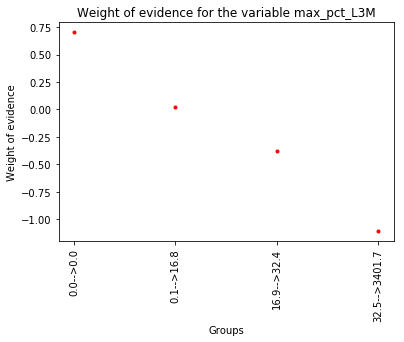

In [24]:
gr7=autogroup(traindev_red,varlist2[6], 'claim_flag', group_method='IV', target=1)
gr7.movegroup('0.0-->1.5','1.6-->16.8', mini=0.1)
gr7.movegroup('16.9-->19.2','19.3-->21.6')
gr7.movegroup('41.2-->75.9','76.2-->3401.7')
gr7.movegroup('32.5-->41.1','41.2-->3401.7')
gr7.movegroup('16.9-->21.6','21.7-->32.4')
print(gr7)
gr7.graph()

## Validation of the variables and creating their WoE

In [25]:
#creating a list with the new name of the variables
varlistgr=[]
for elem in varlist2[:-2]:
    varlistgr+=[elem+'_grp']
varlistgr+=['mentorsectorname_grp']

In [26]:
varlistgr

['employees_grp',
 'minutes_1Ma_grp',
 'minutes_L12M_grp',
 'volume_1Ma_grp',
 'minutes_EL_L3M_grp',
 'pct_EL_L6M_grp',
 'max_pct_L3M_grp',
 'mentorsectorname_grp']

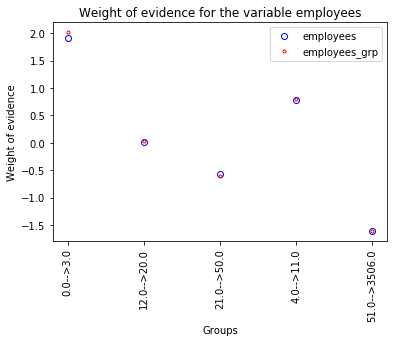

In [27]:
gr1.transform(traindev_red)
gr1.apply(test_red[varlist2[0]],test_red, group=True)
gr1b=autogroupcat(test_red,varlistgr[0],'claim_flag',def_value=list(gr1.WoE.keys())) 
name= str(varlistgr[0])
gr1.compare(gr1b, save=True, name=name)

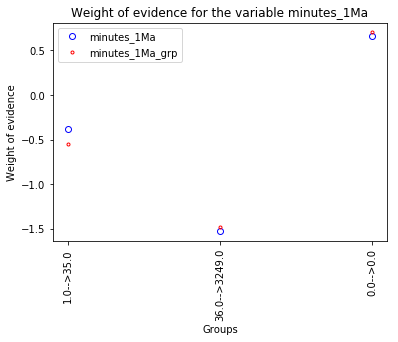

In [28]:
gr2.transform(traindev_red)
gr2.apply(test_red[varlist2[1]],test_red, group=True)
gr2b=autogroupcat(test_red,varlistgr[1],'claim_flag',def_value=list(gr2.WoE.keys())) 
name= str(varlistgr[1])
gr2.compare(gr2b, save=True, name=name)

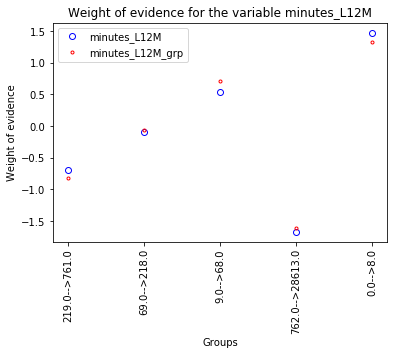

In [29]:
gr3.transform(traindev_red)
gr3.apply(test_red[varlist2[2]],test_red, group=True)
gr3b=autogroupcat(test_red,varlistgr[2],'claim_flag',def_value=gr3.valist()) 
name= str(varlistgr[2])
gr3.compare(gr3b, save=True, name=name)

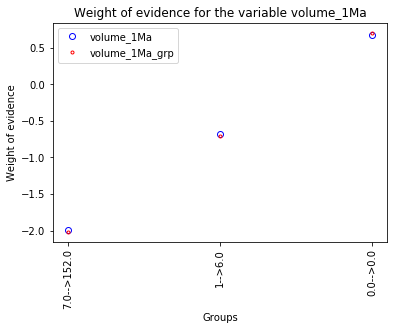

In [30]:
gr4.transform(traindev_red)
gr4.apply(test_red[varlist2[3]],test_red, group=True)
gr4b=autogroupcat(test_red,varlistgr[3],'claim_flag',def_value=list(gr4.WoE.keys())) 
name= str(varlistgr[3])
gr4.compare(gr4b, save=True, name=name)

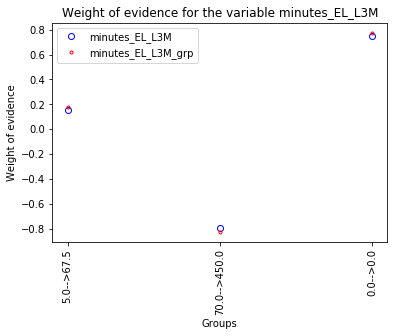

In [31]:
gr5.transform(traindev_red)
gr5.apply(test_red[varlist2[4]],test_red, group=True)
gr5b=autogroupcat(test_red,varlistgr[4],'claim_flag',def_value=list(gr5.WoE.keys())) 
name= str(varlistgr[4])
gr5.compare(gr5b, save=True, name=name)

In [32]:
print (varlist2)
print (varlistgr)

['employees', 'minutes_1Ma', 'minutes_L12M', 'volume_1Ma', 'minutes_EL_L3M', 'pct_EL_L6M', 'max_pct_L3M', 'claim_flag', 'mentorsectorname']
['employees_grp', 'minutes_1Ma_grp', 'minutes_L12M_grp', 'volume_1Ma_grp', 'minutes_EL_L3M_grp', 'pct_EL_L6M_grp', 'max_pct_L3M_grp', 'mentorsectorname_grp']


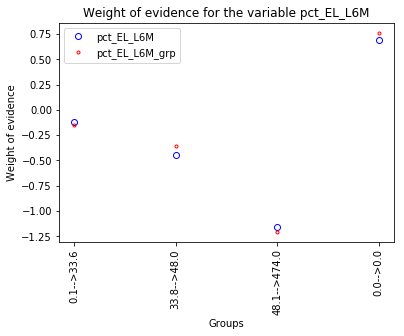

In [33]:
gr6.transform(traindev_red)
gr6.apply(test_red[varlist2[5]],test_red, group=True)
gr6b=autogroupcat(test_red,varlistgr[5],'claim_flag',def_value=list(gr6.WoE.keys())) 
name= str(varlistgr[5])
gr6.compare(gr6b, save=True, name=name)

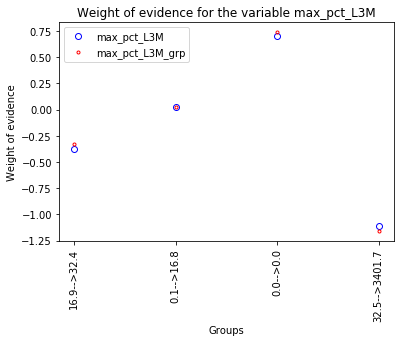

In [34]:
gr7.transform(traindev_red)
gr7.apply(test_red[varlist2[6]],test_red, group=True)
gr7b=autogroupcat(test_red,varlistgr[6],'claim_flag',def_value=list(gr7.WoE.keys())) 
name= str(varlistgr[6])
gr7.compare(gr7b, save=True, name=name)

In [35]:
test_red.columns

Index(['employees', 'minutes_1Ma', 'minutes_L12M', 'volume_1Ma',
       'minutes_EL_L3M', 'pct_EL_L6M', 'max_pct_L3M', 'claim_flag',
       'mentorsectorname', 'employees_WoE', 'employees_grp', 'minutes_1Ma_WoE',
       'minutes_1Ma_grp', 'minutes_L12M_WoE', 'minutes_L12M_grp',
       'volume_1Ma_WoE', 'volume_1Ma_grp', 'minutes_EL_L3M_WoE',
       'minutes_EL_L3M_grp', 'pct_EL_L6M_WoE', 'pct_EL_L6M_grp',
       'max_pct_L3M_WoE', 'max_pct_L3M_grp'],
      dtype='object')

In [36]:
g.transform(traindev_red)
g.apply(test_red[varlist2[8]],test_red, group=True)

# Building a scorecard and validation

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [38]:
traindev_red.columns

Index(['employees', 'minutes_1Ma', 'minutes_L12M', 'volume_1Ma',
       'minutes_EL_L3M', 'pct_EL_L6M', 'max_pct_L3M', 'claim_flag',
       'mentorsectorname', 'employees_WoE', 'minutes_1Ma_WoE',
       'minutes_L12M_WoE', 'volume_1Ma_WoE', 'minutes_EL_L3M_WoE',
       'pct_EL_L6M_WoE', 'max_pct_L3M_WoE', 'mentorsectorname_WoE'],
      dtype='object')

In [39]:

predvar=['employees_WoE',# 'minutes_1Ma_WoE',
         'minutes_L12M_WoE',
       'volume_1Ma_WoE', 'minutes_EL_L3M_WoE',
       #'max_pct_L3M_WoE',
         'mentorsectorname_WoE']
X=traindev_red[predvar]
Y=traindev_red['claim_flag']
X_test=test_red[predvar]
Y_test=test_red['claim_flag']
clf=LogisticRegression()

In [40]:
X=X[predvar]
X.head()

,employees_WoE,minutes_L12M_WoE,volume_1Ma_WoE,minutes_EL_L3M_WoE,mentorsectorname_WoE
0,-1.608914,-1.666279,-1.989514,-0.797807,-0.096060
1,-1.608914,-1.666279,-1.989514,-0.797807,0.338382
2,-0.571986,-1.666279,-1.989514,-0.797807,-0.096060
3,-1.608914,-1.666279,-0.675303,-0.797807,-0.584063
4,-1.608914,-1.666279,-1.989514,0.749651,-0.584063


In [41]:
clf.fit(X,Y)
pred=clf.predict_proba(X_test)[:,1]
predi=clf.predict(X_test)

In [42]:
print ('gini on validation =',round((roc_auc_score(Y_test,pred)-0.5)*2*100,2))
print ('gini on developement =',round((roc_auc_score(Y_test,clf.predict_proba(X)[:,1])-0.5)*2*100,2))

gini on validation = 63.28
gini on developement = 63.22


In [43]:
coef=-clf.coef_[0]
intercept=-clf.intercept_[0]

In [44]:
#verifying the sign of the coefficients 
coef

array([ 0.46689845,  0.52898646,  0.36475205,  0.17803442,  0.26557773])

In [45]:
#attributing the point for each variables
traindev_red['base_pts']=intercept
traindev_red['employees_pts']=traindev_red.employees_WoE*coef[0]
#traindev_red['minutes_1Ma_pts']=traindev_red.minutes_1Ma_WoE*coef[1]
traindev_red['minutes_L12M_pts']=traindev_red.minutes_L12M_WoE*coef[1]
traindev_red['volume_1Ma_pts']=traindev_red.volume_1Ma_WoE*coef[2]
traindev_red['minutes_EL_L3M_pts']=traindev_red.minutes_EL_L3M_WoE*coef[3]
#traindev_red['pct_EL_L6M_pts']=traindev_red.pct_EL_L6M_WoE*coef[5]
#traindev_red['max_pct_L3M_pts']=traindev_red.max_pct_L3M_WoE*coef[5]
traindev_red['mentorsectorname_pts']=traindev_red.mentorsectorname_WoE*coef[4]

traindev_red['evenodds']=0



In [46]:
scorevar=['employees_pts',
 #'minutes_1Ma_pts',
 'minutes_L12M_pts',
 'volume_1Ma_pts',
 'minutes_EL_L3M_pts',
 #'max_pct_L3M_pts',
 'mentorsectorname_pts']

scorevar

['employees_pts',
 'minutes_L12M_pts',
 'volume_1Ma_pts',
 'minutes_EL_L3M_pts',
 'mentorsectorname_pts']

In [47]:
#'Scaling' the scorecard and adding the score together
ES=160
PDO=20
alpha=np.log(2)/PDO
beta=-ES*alpha
traindev_red['score']=0
for elem in scorevar:
    traindev_red[elem]=(traindev_red[elem]+((intercept-beta)/len(scorevar)))/alpha#*Factor+(ES/len(scorevar))
    traindev_red['evenodds']+= (ES/len(scorevar))
    traindev_red['score']+=traindev_red[elem]
traindev_red.tail()

,employees,minutes_1Ma,minutes_L12M,volume_1Ma,minutes_EL_L3M,pct_EL_L6M,max_pct_L3M,claim_flag,mentorsectorname,employees_WoE,...,max_pct_L3M_WoE,mentorsectorname_WoE,base_pts,employees_pts,minutes_L12M_pts,volume_1Ma_pts,minutes_EL_L3M_pts,mentorsectorname_pts,evenodds,score
16470,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hospitality & Leisure,0.785479,...,0.701357,-0.096060,3.534808,62.980445,74.916042,59.414838,56.249550,51.662496,160.0,305.223371
16471,7.0,0.0,24.0,0.0,22.5,0.0,0.0,0.0,Transport & Storage,0.785479,...,0.701357,-0.096060,3.534808,62.980445,60.526719,59.414838,53.171426,51.662496,160.0,287.755924
16472,119.0,0.0,2355.0,0.0,210.0,16.8,8.4,0.0,Manufacturing,-1.608914,...,0.022817,0.338382,3.534808,30.723572,26.965646,59.414838,48.300279,54.991607,160.0,220.395942
16473,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Construction,0.785479,...,0.701357,0.338382,3.534808,62.980445,74.916042,59.414838,56.249550,54.991607,160.0,308.552482
16474,22.0,0.0,126.0,0.0,67.5,11.4,5.7,0.0,Hospitality & Leisure,-0.571986,...,0.022817,-0.096060,3.534808,44.692901,50.871679,59.414838,53.171426,51.662496,160.0,259.813340


In [48]:
#having a look at the "good" observations
traindev_red.tail()

,employees,minutes_1Ma,minutes_L12M,volume_1Ma,minutes_EL_L3M,pct_EL_L6M,max_pct_L3M,claim_flag,mentorsectorname,employees_WoE,...,max_pct_L3M_WoE,mentorsectorname_WoE,base_pts,employees_pts,minutes_L12M_pts,volume_1Ma_pts,minutes_EL_L3M_pts,mentorsectorname_pts,evenodds,score
16470,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hospitality & Leisure,0.785479,...,0.701357,-0.096060,3.534808,62.980445,74.916042,59.414838,56.249550,51.662496,160.0,305.223371
16471,7.0,0.0,24.0,0.0,22.5,0.0,0.0,0.0,Transport & Storage,0.785479,...,0.701357,-0.096060,3.534808,62.980445,60.526719,59.414838,53.171426,51.662496,160.0,287.755924
16472,119.0,0.0,2355.0,0.0,210.0,16.8,8.4,0.0,Manufacturing,-1.608914,...,0.022817,0.338382,3.534808,30.723572,26.965646,59.414838,48.300279,54.991607,160.0,220.395942
16473,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Construction,0.785479,...,0.701357,0.338382,3.534808,62.980445,74.916042,59.414838,56.249550,54.991607,160.0,308.552482
16474,22.0,0.0,126.0,0.0,67.5,11.4,5.7,0.0,Hospitality & Leisure,-0.571986,...,0.022817,-0.096060,3.534808,44.692901,50.871679,59.414838,53.171426,51.662496,160.0,259.813340


In [49]:
#having a look at the "bad" observations
traindev_red.head()

,employees,minutes_1Ma,minutes_L12M,volume_1Ma,minutes_EL_L3M,pct_EL_L6M,max_pct_L3M,claim_flag,mentorsectorname,employees_WoE,...,max_pct_L3M_WoE,mentorsectorname_WoE,base_pts,employees_pts,minutes_L12M_pts,volume_1Ma_pts,minutes_EL_L3M_pts,mentorsectorname_pts,evenodds,score
0,650.0,1053.0,8142.0,42.0,70.0,24.8,24.8,1.0,Transport & Storage,-1.608914,...,-0.378052,-0.096060,3.534808,30.723572,26.965646,31.459927,48.300279,51.662496,160.0,189.111920
1,373.0,666.0,4797.0,16.0,105.0,131.2,72.3,1.0,Manufacturing,-1.608914,...,-1.108023,0.338382,3.534808,30.723572,26.965646,31.459927,48.300279,54.991607,160.0,192.441030
2,40.0,945.0,3344.0,35.0,105.0,115.2,57.6,1.0,Professionals & Offices,-0.571986,...,-1.108023,-0.096060,3.534808,44.692901,26.965646,31.459927,48.300279,51.662496,160.0,203.081248
3,140.0,45.0,1472.0,6.0,105.0,14.9,3.6,1.0,Education,-1.608914,...,0.022817,-0.584063,3.534808,30.723572,26.965646,45.291358,48.300279,47.922953,160.0,199.203808
4,702.0,325.0,3257.0,30.0,0.0,0.0,0.0,1.0,Education,-1.608914,...,0.701357,-0.584063,3.534808,30.723572,26.965646,31.459927,56.249550,47.922953,160.0,193.321648


In [50]:
varlistgr=['employees_grp', #'minutes_1Ma_grp',
           'minutes_L12M_grp',
        'volume_1Ma_grp', 'minutes_EL_L3M_grp', #'max_pct_L3M_grp', 
       'mentorsectorname_grp']
scorevar=['employees_pts',#'minutes_1Ma_pts', 
          'minutes_L12M_pts',
 'volume_1Ma_pts', 'minutes_EL_L3M_pts',#'max_pct_L3M_pts',
 'mentorsectorname_pts']
predvar=['employees_WoE', #'minutes_1Ma_WoE', 
         'minutes_L12M_WoE',
 'volume_1Ma_WoE', 'minutes_EL_L3M_WoE', #'max_pct_L3M_WoE',
 'mentorsectorname_WoE']

In [51]:
list_of_pts=[]
for pts,woe, grp in zip(scorevar[:-1],predvar[:-1],varlistgr[:-1]):
    df1=test_red[[woe,grp]].drop_duplicates()
    #df1=df1.groupby(by=woe)[grp].min()
    #df1[woe]=list(df1.index)
    df2=traindev_red[[woe,pts]].drop_duplicates()
    #df2=df2.groupby(by=woe)[pts].min()
    df3=df1.merge(df2, on=woe)
    df3[pts]=round(df3[pts])
    list_of_pts+=[df3]
list_of_pts   +=[round(traindev_red[['mentorsectorname','mentorsectorname_pts' ]].drop_duplicates())]
list_of_pts

[   employees_WoE  employees_grp  employees_pts
 0      -1.608914  51.0-->3506.0           31.0
 1      -0.571986    21.0-->50.0           45.0
 2       0.014089    12.0-->20.0           53.0
 3       0.785479     4.0-->11.0           63.0
 4       1.915044      0.0-->3.0           78.0,
    minutes_L12M_WoE minutes_L12M_grp  minutes_L12M_pts
 0         -1.666279  762.0-->28613.0              27.0
 1         -0.100039     69.0-->218.0              51.0
 2         -0.699962    219.0-->761.0              42.0
 3          1.475265        0.0-->8.0              75.0
 4          0.532526       9.0-->68.0              61.0,
    volume_1Ma_WoE volume_1Ma_grp  volume_1Ma_pts
 0       -1.989514    7.0-->152.0            31.0
 1       -0.675303        1-->6.0            45.0
 2        0.666656      0.0-->0.0            59.0,
    minutes_EL_L3M_WoE minutes_EL_L3M_grp  minutes_EL_L3M_pts
 0           -0.797807       70.0-->450.0                48.0
 1            0.749651          0.0-->0.0        

In [52]:
#subsetting only the point for the different variables + the score and the flag
trainscore=traindev_red[scorevar+['score']]
trainscore['flag']=Y
trainscore.head()


,employees_pts,minutes_L12M_pts,volume_1Ma_pts,minutes_EL_L3M_pts,mentorsectorname_pts,score,flag
0,30.723572,26.965646,31.459927,48.300279,51.662496,189.111920,1.0
1,30.723572,26.965646,31.459927,48.300279,54.991607,192.441030,1.0
2,44.692901,26.965646,31.459927,48.300279,51.662496,203.081248,1.0
3,30.723572,26.965646,45.291358,48.300279,47.922953,199.203808,1.0
4,30.723572,26.965646,31.459927,56.249550,47.922953,193.321648,1.0


In [53]:
#having a look at the different points assigned to the variables
trainscore.describe()

,employees_pts,minutes_L12M_pts,volume_1Ma_pts,minutes_EL_L3M_pts,mentorsectorname_pts,score,flag
count,16944.000000,16944.000000,16944.000000,16944.000000,16944.000000,16944.000000,16944.000000
mean,57.950837,60.877651,55.839036,53.222573,52.920605,280.810701,0.027738
std,12.361534,15.699284,7.374142,2.885351,2.962989,31.063767,0.164227
min,30.723572,26.965646,31.459927,48.300279,47.922953,185.372377,0.000000
25%,52.588405,50.871679,59.414838,53.171426,51.662496,261.881131,0.000000
50%,62.980445,60.526719,59.414838,53.171426,51.662496,287.755924,0.000000
75%,62.980445,74.916042,59.414838,56.249550,54.991607,305.223371,0.000000
max,78.197778,74.916042,59.414838,56.249550,59.683516,328.461724,1.000000


In [54]:
#the bad population
trainscore[trainscore.flag==1].describe()

,employees_pts,minutes_L12M_pts,volume_1Ma_pts,minutes_EL_L3M_pts,mentorsectorname_pts,score,flag
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.0
mean,46.345617,43.261496,47.382999,51.481250,51.866211,240.337573,1.0
std,12.669052,15.850399,11.362121,3.083745,2.807306,34.087728,0.0
min,30.723572,26.965646,31.459927,48.300279,47.922953,185.372377,1.0
25%,30.723572,26.965646,31.459927,48.300279,51.662496,210.976752,1.0
50%,44.692901,41.714856,45.291358,53.171426,51.662496,240.380184,1.0
75%,52.588405,50.871679,59.414838,53.171426,54.991607,265.143202,1.0
max,78.197778,74.916042,59.414838,56.249550,59.683516,323.769815,1.0


In [55]:
#the good population
trainscore[trainscore.flag==0].describe()

,employees_pts,minutes_L12M_pts,volume_1Ma_pts,minutes_EL_L3M_pts,mentorsectorname_pts,score,flag
count,16474.000000,16474.000000,16474.000000,16474.000000,16474.000000,16474.000000,16474.0
mean,58.281932,61.380236,56.080285,53.272252,52.950686,281.965392,0.0
std,12.192020,15.402596,7.082062,2.864098,2.961889,30.188356,0.0
min,30.723572,26.965646,31.459927,48.300279,47.922953,185.372377,0.0
25%,52.588405,50.871679,59.414838,53.171426,51.662496,263.969300,0.0
50%,62.980445,60.526719,59.414838,53.171426,51.662496,287.755924,0.0
75%,62.980445,74.916042,59.414838,56.249550,54.991607,305.223371,0.0
max,78.197778,74.916042,59.414838,56.249550,59.683516,328.461724,0.0


## distribution of the development population

In [56]:
#calculating the cumulative distribution
bla=pd.crosstab(trainscore.score, trainscore.flag)
good=np.array(bla[0])
goods=100*good.cumsum()/sum(good)
bad=np.array(bla[1])
bads=100*bad.cumsum()/sum(bad)
Xs=bla.index.tolist()

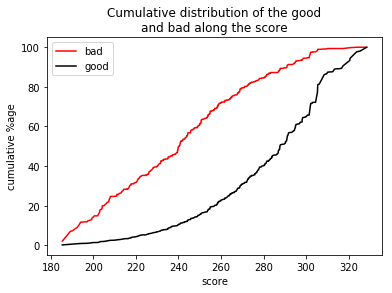

In [57]:
distrib=plt.figure()
plt.plot(Xs, bads, c='r', label='bad')
plt.plot(Xs,goods, c='k', label='good')
plt.xlabel('score')
plt.ylabel('cumulative %age')
plt.legend()
plt.title('Cumulative distribution of the good\nand bad along the score')
plt.show()
distrib.savefig('distribution_train.png')

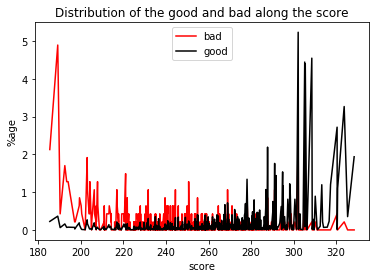

In [58]:
goodp=100*good/sum(good)
badp=100*bad/sum(bad)
plt.plot(Xs, badp, c='r', label='bad')
plt.plot(Xs,goodp, c='k', label='good')
plt.xlabel('score')
plt.ylabel('%age')
plt.title('Distribution of the good and bad along the score')
plt.legend()
plt.show()

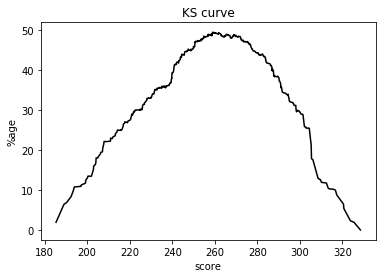

KS maximum: 49.48


In [59]:
KS=abs(goods-bads)
plt.plot(Xs,KS, c='k', label='KS')
plt.xlabel('score')
plt.ylabel('%age')
plt.title('KS curve')
plt.show()
print('KS maximum:', round(max(KS),2))

## Characterisation on the validation sample

In [91]:
#same as before but on the validation sample
testset=X_test
testset['base_pts']=intercept
testset['employees_pts']=testset.employees_WoE*coef[0]
#testset['minutes_1Ma_pts']=testset.minutes_1Ma_WoE*coef[1]
testset['minutes_L12M_pts']=testset.minutes_L12M_WoE*coef[1]
testset['volume_1Ma_pts']=testset.volume_1Ma_WoE*coef[2]
testset['minutes_EL_L3M_pts']=testset.minutes_EL_L3M_WoE*coef[3]
#testset['pct_EL_L6M_pts']=testset.pct_EL_L6M_WoE*coef[5]
#testset['max_pct_L3M_pts']=testset.max_pct_L3M_WoE*coef[5]
testset['mentorsectorname_pts']=testset.mentorsectorname_WoE*coef[4]
testset['evenodds']=0
testset['score']=0
for elem in scorevar:
    testset[elem]=(testset[elem]+((intercept-beta)/len(scorevar)))/alpha
    testset['evenodds']+= (ES/len(scorevar))
    testset['score']+=testset[elem]

testset['flag']=Y_test
bla=pd.crosstab(testset.score, testset.flag)
good=np.array(bla[0])
goods=100*good.cumsum()/sum(good)
bad=np.array(bla[1])
bads=100*bad.cumsum()/sum(bad)
Xs=bla.index.tolist()

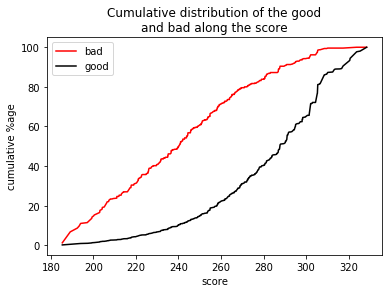

In [61]:
dis=plt.figure()
plt.plot(Xs, bads, c='r', label='bad')
plt.plot(Xs,goods, c='k', label='good')
plt.xlabel('score')
plt.ylabel('cumulative %age')
plt.legend()
plt.title('Cumulative distribution of the good\nand bad along the score')
plt.show()
dis.savefig('distribution_test.png')

In [96]:
vals=range(180,360,20)
goodlist=[0]
goodl=[]
balist=[0]
badl=[]
goodcumpct=[]
goodpct=[]
rangey=[]
badcumpct=[]
badpct=[]
for v in vals:
    goodlist+=[bla[bla.index<=v][0.0].sum()]
    goodl+=[goodlist[-1]-goodlist[-2]]
    goodcumpct+=[goodlist[-1]/bla[0.0].sum()]
    goodpct+=[goodl[-1]/bla[0.0].sum()]
    balist+=[bla[bla.index<=v][1.0].sum()]
    badcumpct+=[balist[-1]/bla[1.0].sum()]

    badl+=[balist[-1]-balist[-2]]
    badpct+=[badl[-1]/bla[1.0].sum()]
    rangey+=[str(v-20)+'-'+str(v)]
dataf=pd.DataFrame({'range':rangey,'badcumpct':badcumpct, 'badpct':badpct, 'cumgood':goodlist[1:],'goodcumpct':goodcumpct, 'cumbad':balist[1:], 'good':goodl, 'bad':badl, 'goodpct':goodpct})
dataf

,bad,badcumpct,badpct,cumbad,cumgood,good,goodcumpct,goodpct,range
0,8,0.017021,0.017021,8,19,19,0.001153,0.001153,160-180
1,75,0.176596,0.159574,83,285,266,0.017300,0.016147,180-200
2,76,0.338298,0.161702,159,824,539,0.050018,0.032718,200-220
3,95,0.540426,0.202128,254,1835,1011,0.111388,0.061369,220-240
4,86,0.723404,0.182979,340,4021,2186,0.244082,0.132694,240-260
5,64,0.859574,0.136170,404,7204,3183,0.437295,0.193214,260-280
6,50,0.965957,0.106383,454,12256,5052,0.743960,0.306665,280-300
7,15,0.997872,0.031915,469,15348,3092,0.931650,0.187690,300-320
8,1,1.000000,0.002128,470,16474,1126,1.000000,0.068350,320-340


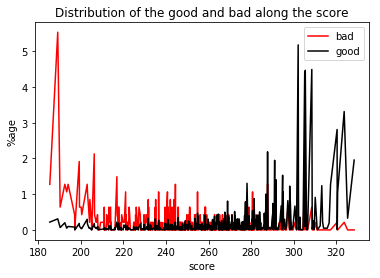

In [62]:
goodp=100*good/sum(good)
badp=100*bad/sum(bad)
plt.plot(Xs, badp, c='r', label='bad')
plt.plot(Xs,goodp, c='k', label='good')
plt.xlabel('score')
plt.ylabel('%age')
plt.title('Distribution of the good and bad along the score')
plt.legend()
plt.show()

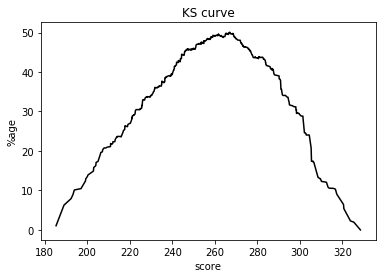

KS maximum: 50.07


In [63]:
KS=abs(goods-bads)
plt.plot(Xs,KS, c='k', label='KS')
plt.xlabel('score')
plt.ylabel('%age')
plt.title('KS curve')
plt.show()
print('KS maximum:', round(max(KS),2))

# bootstrapping

In [64]:
score=np.array(testset.score.tolist())
flag=testset.flag.tolist()
Gini=[]
for __ in range(200):
    n=500
    samplescore=[]
    sampleflag=[]
    sampled=np.random.choice(range(len(score)),n)
    for i in sampled:
        samplescore+=[score[i]]
        sampleflag+=[flag[i]]
    gini=(roc_auc_score(sampleflag,samplescore)-0.5)*2*100
    Gini+=[gini]
np.average(Gini)

-61.909434704006344

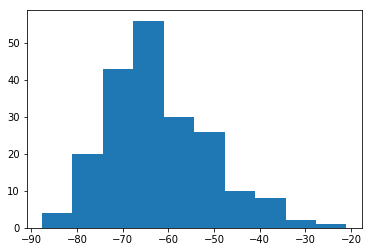

In [65]:
plt.hist(Gini)
plt.show()

In [66]:
bootlist=['claim_flag',
       'employees_grp', #'minutes_1Ma_grp',
         'minutes_L12M_grp',
        'volume_1Ma_grp', 
       'minutes_EL_L3M_grp',
        #'max_pct_L3M_grp', 
       'mentorsectorname_grp']
woelist=[]
scorevar=[]
for elem in bootlist[1:]:
    woelist+=[elem+'_WoE']
    scorevar+=[elem[:-3]+'pts']
groupinglist=[gr1,# gr2, 
              
              gr3, gr4, gr5, #gr7,
              g]
bootset=test_red[bootlist]
samplelist=[]
for n in range(10):
    samplelist+=['s'+str(n)]
for sl in samplelist:
    blop=np.random.uniform(size=len(bootset))
    bootset[sl]=blop.round()

gini on validation = 65.14
gini on developement = 66.17
list of the coefficients: [ 0.55297782  0.44355249  0.39433304  0.22882607  0.20491277]
       employees_grp  employees_pts
2771   51.0-->3506.0           23.0
14702    21.0-->50.0           46.0
2845     12.0-->20.0           51.0
14123     4.0-->11.0           64.0
1297       0.0-->3.0           92.0
      minutes_L12M_grp  minutes_L12M_pts
1290   762.0-->28613.0              31.0
4372     219.0-->761.0              40.0
2845      69.0-->218.0              51.0
14123       9.0-->68.0              62.0
1297         0.0-->8.0              69.0
      volume_1Ma_grp  volume_1Ma_pts
9382     7.0-->152.0            29.0
10367        1-->6.0            43.0
14123      0.0-->0.0            60.0
      minutes_EL_L3M_grp  minutes_EL_L3M_pts
4372        70.0-->450.0                46.0
14123         5.0-->67.5                52.0
1297           0.0-->0.0                58.0
                    mentorsectorname_grp  mentorsectorname_pts
136

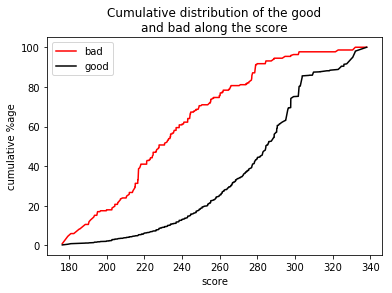

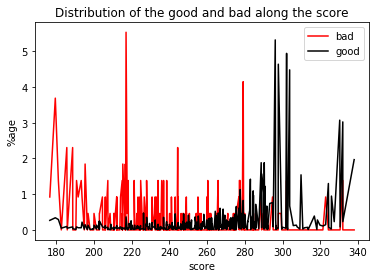

********************************************************************************
gini on validation = 63.92
gini on developement = 61.67
list of the coefficients: [ 0.49093851  0.41179265  0.48904627  0.08802214  0.50194523]
       employees_grp  employees_pts
13968  51.0-->3506.0           30.0
767      21.0-->50.0           43.0
16296    12.0-->20.0           55.0
1303      4.0-->11.0           63.0
12926      0.0-->3.0           76.0
      minutes_L12M_grp  minutes_L12M_pts
767    762.0-->28613.0              35.0
15935    219.0-->761.0              41.0
1303      69.0-->218.0              50.0
9137        9.0-->68.0              62.0
16296        0.0-->8.0              67.0
      volume_1Ma_grp  volume_1Ma_pts
9418     7.0-->152.0            23.0
15935        1-->6.0            43.0
16296      0.0-->0.0            62.0
      minutes_EL_L3M_grp  minutes_EL_L3M_pts
767         70.0-->450.0                50.0
16296         5.0-->67.5                52.0
7467           0.0-->0.0      

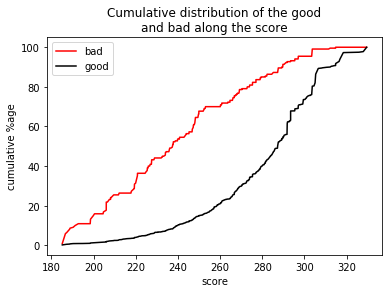

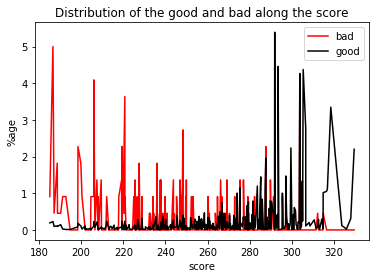

********************************************************************************
gini on validation = 60.41
gini on developement = 68.04
list of the coefficients: [ 0.40665824  0.51329965  0.45840264  0.05211197  0.29663535]
       employees_grp  employees_pts
16319  51.0-->3506.0           36.0
11479    21.0-->50.0           43.0
14463    12.0-->20.0           52.0
11590     4.0-->11.0           61.0
2664       0.0-->3.0           82.0
      minutes_L12M_grp  minutes_L12M_pts
220    762.0-->28613.0              27.0
5543     219.0-->761.0              39.0
1901      69.0-->218.0              49.0
16319       9.0-->68.0              67.0
11590        0.0-->8.0              75.0
      volume_1Ma_grp  volume_1Ma_pts
2980     7.0-->152.0            28.0
5543         1-->6.0            39.0
11590      0.0-->0.0            64.0
      minutes_EL_L3M_grp  minutes_EL_L3M_pts
11479       70.0-->450.0                51.0
1901          5.0-->67.5                52.0
11590          0.0-->0.0      

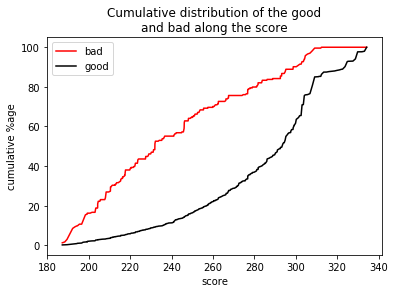

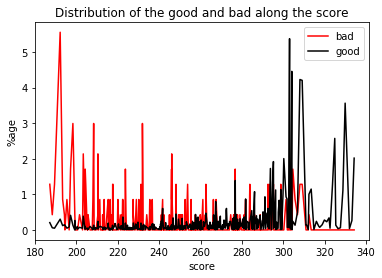

********************************************************************************
gini on validation = 60.38
gini on developement = 65.23
list of the coefficients: [ 0.48303388  0.55203317  0.3306915   0.11096601  0.37978935]
       employees_grp  employees_pts
88     51.0-->3506.0           29.0
7075     21.0-->50.0           43.0
10722    12.0-->20.0           53.0
2828      4.0-->11.0           63.0
11331      0.0-->3.0           78.0
     minutes_L12M_grp  minutes_L12M_pts
88    762.0-->28613.0              26.0
9990     69.0-->218.0              42.0
1695    219.0-->761.0              43.0
2898       9.0-->68.0              67.0
2828        0.0-->8.0              76.0
     volume_1Ma_grp  volume_1Ma_pts
662     7.0-->152.0            33.0
1695        1-->6.0            46.0
2828      0.0-->0.0            58.0
      minutes_EL_L3M_grp  minutes_EL_L3M_pts
10722       70.0-->450.0                49.0
2828          5.0-->67.5                53.0
11331          0.0-->0.0                

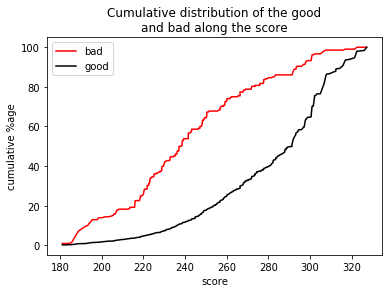

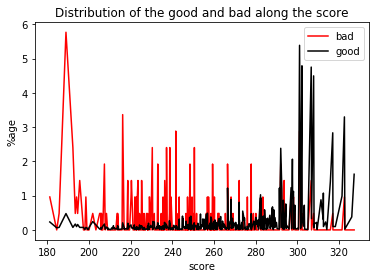

********************************************************************************
gini on validation = 60.67
gini on developement = 68.01
list of the coefficients: [ 0.31811439  0.5466123   0.3661799   0.28105718  0.51783782]
       employees_grp  employees_pts
10065  51.0-->3506.0           37.0
7748     21.0-->50.0           46.0
5260     12.0-->20.0           53.0
8239      4.0-->11.0           59.0
12598      0.0-->3.0           68.0
      minutes_L12M_grp  minutes_L12M_pts
6729   762.0-->28613.0              22.0
7748     219.0-->761.0              39.0
5260      69.0-->218.0              56.0
10947       9.0-->68.0              67.0
12806        0.0-->8.0              73.0
      volume_1Ma_grp  volume_1Ma_pts
10065    7.0-->152.0            28.0
13233        1-->6.0            45.0
5260       0.0-->0.0            60.0
      minutes_EL_L3M_grp  minutes_EL_L3M_pts
14797       70.0-->450.0                44.0
5260          5.0-->67.5                54.0
8239           0.0-->0.0      

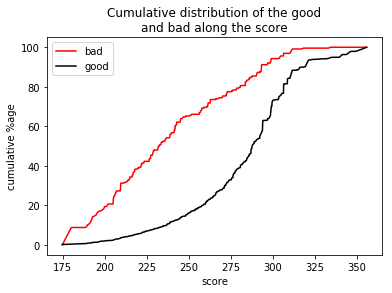

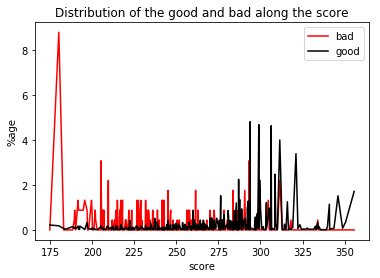

********************************************************************************
gini on validation = 51.96
gini on developement = 65.18
list of the coefficients: [ 0.42059425  0.45272388  0.56119864 -0.19315763  0.3270278 ]
       employees_grp  employees_pts
2909   51.0-->3506.0           32.0
3064     21.0-->50.0           47.0
449      12.0-->20.0           50.0
6255      4.0-->11.0           61.0
11941      0.0-->3.0           68.0
      minutes_L12M_grp  minutes_L12M_pts
2909   762.0-->28613.0              31.0
1703     219.0-->761.0              39.0
6255      69.0-->218.0              53.0
14308       9.0-->68.0              59.0
2430         0.0-->8.0              72.0
     volume_1Ma_grp  volume_1Ma_pts
4469    7.0-->152.0            17.0
2909        1-->6.0            38.0
6255      0.0-->0.0            66.0
     minutes_EL_L3M_grp  minutes_EL_L3M_pts
1703          0.0-->0.0                49.0
6255         5.0-->67.5                51.0
279        70.0-->450.0              

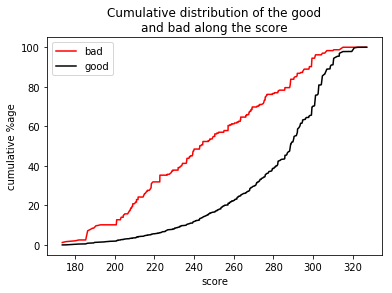

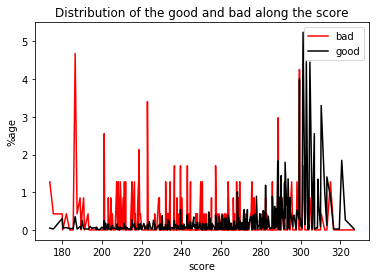

********************************************************************************
gini on validation = 64.36
gini on developement = 66.75
list of the coefficients: [ 0.57007649  0.48682972  0.33005801  0.16605338  0.16198745]
       employees_grp  employees_pts
9540   51.0-->3506.0           26.0
9914     21.0-->50.0           39.0
8898     12.0-->20.0           53.0
8499      4.0-->11.0           70.0
12626      0.0-->3.0           93.0
      minutes_L12M_grp  minutes_L12M_pts
11007  762.0-->28613.0              31.0
1741     219.0-->761.0              38.0
9914      69.0-->218.0              55.0
530         9.0-->68.0              61.0
8499         0.0-->8.0              72.0
     volume_1Ma_grp  volume_1Ma_pts
2936    7.0-->152.0            34.0
9914        1-->6.0            45.0
8499      0.0-->0.0            59.0
     minutes_EL_L3M_grp  minutes_EL_L3M_pts
9540       70.0-->450.0                49.0
8499         5.0-->67.5                53.0
9914          0.0-->0.0              

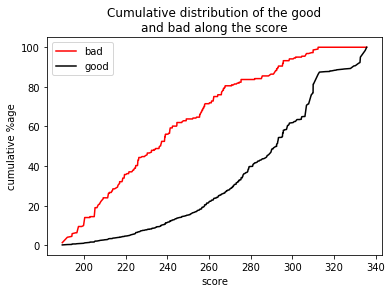

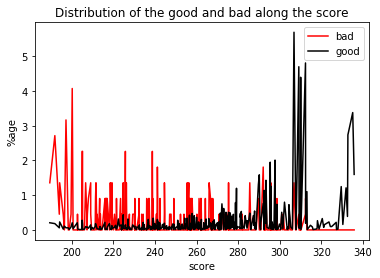

********************************************************************************
gini on validation = 58.7
gini on developement = 70.33
list of the coefficients: [ 0.37023108  0.5480734   0.41864849  0.06937834  0.47079898]
      employees_grp  employees_pts
64    51.0-->3506.0           37.0
4453    21.0-->50.0           44.0
8484    12.0-->20.0           54.0
356      4.0-->11.0           61.0
3736      0.0-->3.0           83.0
      minutes_L12M_grp  minutes_L12M_pts
4453   762.0-->28613.0              24.0
78       219.0-->761.0              40.0
13851     69.0-->218.0              46.0
1296        9.0-->68.0              73.0
8484         0.0-->8.0              81.0
     volume_1Ma_grp  volume_1Ma_pts
249     7.0-->152.0            25.0
1296        1-->6.0            43.0
4453      0.0-->0.0            63.0
     minutes_EL_L3M_grp  minutes_EL_L3M_pts
78         70.0-->450.0                51.0
4453         5.0-->67.5                53.0
2556          0.0-->0.0                54.0


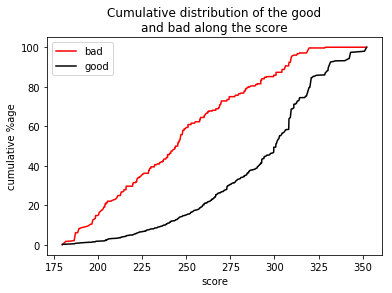

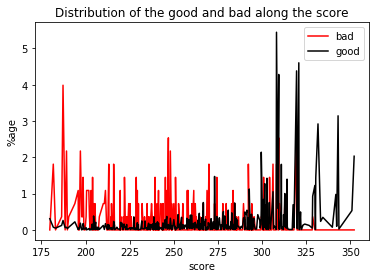

********************************************************************************
gini on validation = 63.9
gini on developement = 68.46
list of the coefficients: [ 0.50779507  0.37769902  0.46545696  0.29340363 -0.03906089]
       employees_grp  employees_pts
8079   51.0-->3506.0           27.0
1050     21.0-->50.0           44.0
4570     12.0-->20.0           56.0
12392     4.0-->11.0           67.0
6397       0.0-->3.0           79.0
      minutes_L12M_grp  minutes_L12M_pts
6286   762.0-->28613.0              34.0
12392    219.0-->761.0              46.0
6230      69.0-->218.0              53.0
4868        9.0-->68.0              62.0
6397         0.0-->8.0              67.0
      volume_1Ma_grp  volume_1Ma_pts
3402     7.0-->152.0            27.0
16211        1-->6.0            41.0
6397       0.0-->0.0            66.0
     minutes_EL_L3M_grp  minutes_EL_L3M_pts
4570       70.0-->450.0                45.0
6397         5.0-->67.5                55.0
1135          0.0-->0.0           

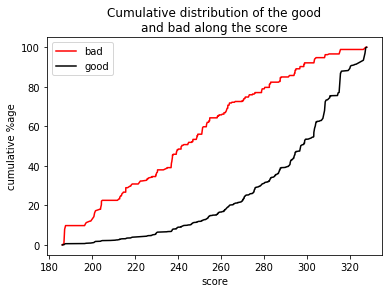

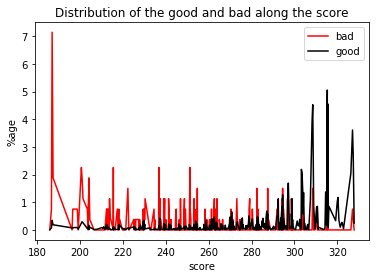

********************************************************************************
gini on validation = 59.52
gini on developement = 60.9
list of the coefficients: [ 0.5416254   0.55008759  0.33623834 -0.12175471  0.48038918]
       employees_grp  employees_pts
806    51.0-->3506.0           31.0
14221    21.0-->50.0           39.0
8302     12.0-->20.0           55.0
244       4.0-->11.0           66.0
15749      0.0-->3.0           75.0
      minutes_L12M_grp  minutes_L12M_pts
806    762.0-->28613.0              24.0
10738    219.0-->761.0              42.0
13879     69.0-->218.0              53.0
244         9.0-->68.0              65.0
15328        0.0-->8.0              68.0
      volume_1Ma_grp  volume_1Ma_pts
708      7.0-->152.0            32.0
10738        1-->6.0            47.0
244        0.0-->0.0            57.0
      minutes_EL_L3M_grp  minutes_EL_L3M_pts
8947           0.0-->0.0                50.0
244           5.0-->67.5                51.0
15328       70.0-->450.0       

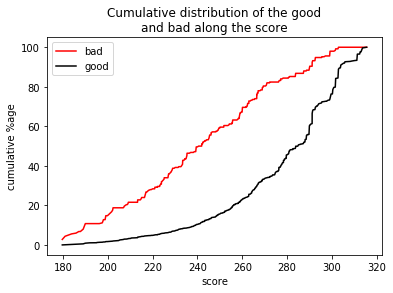

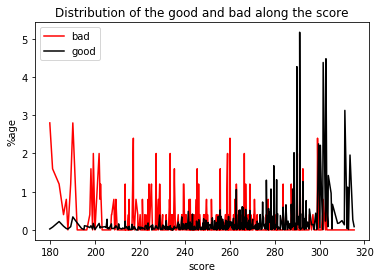

********************************************************************************


In [67]:
for sl in samplelist:
    train_set=bootset[bootset[sl]==1]
    train_set=train_set.sample(frac=1, replace=True)
    test_set=bootset[bootset[sl]==0]
    test_set=test_set.sample(frac=1, replace=True)
    for grp, grps in zip( bootlist[1:],groupinglist):
        gp=autogroupcat(train_set,grp,bootlist[0],def_value=grps.valist()) 
        gp.transform(train_set)
        gp.apply(test_set[grp], test_set)
    clf=LogisticRegression()
    clf.fit(train_set[woelist], train_set['claim_flag'])
    print ('gini on validation =',round((roc_auc_score(test_set['claim_flag'],clf.predict_proba(test_set[woelist])[:,1])-0.5)*2*100,2))
    print ('gini on developement =',round((roc_auc_score(train_set['claim_flag'],clf.predict_proba(train_set[woelist])[:,1])-0.5)*2*100,2))

    coef=-clf.coef_[0]
    intercept=-clf.intercept_[0]
    print('list of the coefficients:',coef)
    
    ES=160
    PDO=20
    alpha=np.log(2)/PDO
    beta=-ES*alpha
    train_set['score']=0
    test_set['score']=0
    for elem,woe,coe in zip(scorevar, woelist, coef):
        train_set[elem]=((train_set[woe]*coe)+((intercept-beta)/len(scorevar)))/alpha
        train_set['score']+=train_set[elem]
        test_set[elem]=((test_set[woe]*coe)+((intercept-beta)/len(scorevar)))/alpha
        test_set['score']+=test_set[elem]
        
        
    list_of_pts=[]
    for pts, grp in zip(scorevar,bootlist[1:]):
        df1=test_set[[grp, pts]].drop_duplicates().sort_values([pts])
        df1[pts]=round(df1[pts])
        list_of_pts+=[df1]
    for elem in list_of_pts:
        print(elem)
    bla=pd.crosstab(test_set.score, test_set.claim_flag)
    good=np.array(bla[0])
    goods=100*good.cumsum()/sum(good)
    bad=np.array(bla[1])
    bads=100*bad.cumsum()/sum(bad)
    Xs=bla.index.tolist()

    dis=plt.figure()
    plt.plot(Xs, bads, c='r', label='bad')
    plt.plot(Xs,goods, c='k', label='good')
    plt.xlabel('score')
    plt.ylabel('cumulative %age')
    plt.legend()
    plt.title('Cumulative distribution of the good\nand bad along the score')
    plt.show()
    name='distribution_test'+str(sl)+'.png'
    dis.savefig(name)

    goodp=100*good/sum(good)
    badp=100*bad/sum(bad)
    plt.plot(Xs, badp, c='r', label='bad')
    plt.plot(Xs,goodp, c='k', label='good')
    plt.xlabel('score')
    plt.ylabel('%age')
    plt.title('Distribution of the good and bad along the score')
    plt.legend()
    plt.show()
    print('*'*80)
        #gr2b=autogroupcat(test_red,varlistgr[1],'claim_flag',def_value=gr2.valist())  